<a href="https://colab.research.google.com/github/sahilnegi1/-HactoberFest2022-For_All_Beginers-/blob/main/SA_Movie_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [5]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string


def preprocess_text(text):
    # Removing irrelevant information
    # (Replace this with your own logic for removing irrelevant information)
    processed_text = text

    # Removing special characters and punctuation
    processed_text = processed_text.translate(str.maketrans('', '', string.punctuation))

    # Tokenization
    tokens = word_tokenize(processed_text)

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Stop word removal
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.lower() not in stop_words]

    # Joining tokens back into a sentence
    processed_text = ' '.join(tokens)

    return processed_text



In [6]:
import pandas as pd

# Function to process the uploaded CSV file
def process_csv(file_path):
    try:
        # Read the CSV file
        df = pd.read_csv(file_path)
        
        # Perform any desired operations on the data
        # For example, print the first few rows of the DataFrame
        print(df.head())
        
        # You can also perform other operations on the data
        
    except Exception as e:
        print("Error: ", str(e))

# Ask the user to upload a file
file_path = input("Upload a CSV file and copy file path here: ")

# Store the file path in a variable
csv_path = file_path


Upload a CSV file and copy file path here: /content/movie_review.csv


In [8]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the data
data = pd.read_csv(csv_path,encoding='latin1')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['review_text'], data['sentiment'], test_size=0.3, random_state=42)

# Create a CountVectorizer to convert text into numerical features
vectorizer = CountVectorizer()

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Create the Multinomial Naive Bayes classifier
classifier = MultinomialNB()

# Train the classifier
classifier.fit(X_train_vectorized, y_train)

# Transform the testing data
X_test_vectorized = vectorizer.transform(X_test)

# Predict the sentiment of the testing data
predictions = classifier.predict(X_test_vectorized)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# Print the evaluation metrics
print("MultinomialNB")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


MultinomialNB
Accuracy: 0.8419384057971014
Precision: 0.8593903638151426
Recall: 0.8092592592592592
F1 Score: 0.8335717691940868


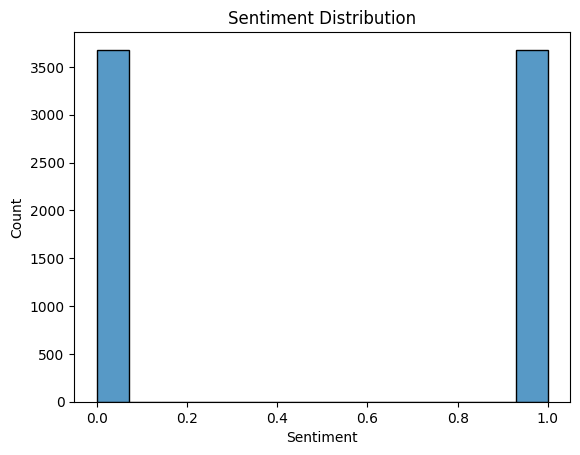

-----------------------------------
-----------------------------------
-----------------------------------


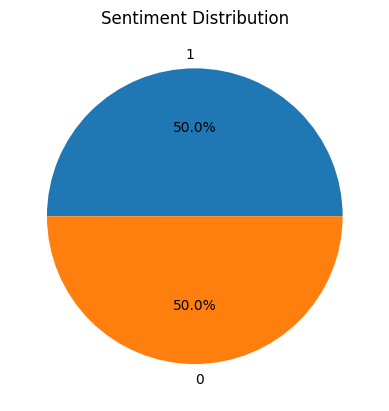

-----------------------------------
-----------------------------------
-----------------------------------


KeyboardInterrupt: ignored

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import networkx as nx
import seaborn as sns

# Load the data
data = pd.read_csv('/content/movie_review.csv')

# Create a histogram of sentiment distribution
sns.histplot(data=data, x='sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()
print('-----------------------------------')
print('-----------------------------------')
print('-----------------------------------')
# Create a pie chart of sentiment distribution
sentiment_counts = data['sentiment'].value_counts()
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()
print('-----------------------------------')
print('-----------------------------------')
print('-----------------------------------')
# Generate a word cloud of most frequent words in positive reviews
positive_reviews = data[data['sentiment'] == 1]['review_text']
positive_wordcloud = WordCloud().generate(' '.join(positive_reviews))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Positive Reviews')
plt.show()
print('-----------------------------------')
print('-----------------------------------')
print('-----------------------------------')
# Generate a network graph of co-occurring words in reviews
graph = nx.Graph()
reviews = data['review_text']
for review in reviews:
    words = review.split()
    for i in range(len(words) - 1):
        word1 = words[i]
        word2 = words[i+1]
        if not graph.has_edge(word1, word2):
            graph.add_edge(word1, word2, weight=1)
        else:
            graph[word1][word2]['weight'] += 1

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(graph, k=0.3)
nx.draw_networkx(graph, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=8, edge_color='gray', width=0.5)
plt.title('Co-occurring Words Network Graph')
plt.axis('off')
plt.show()


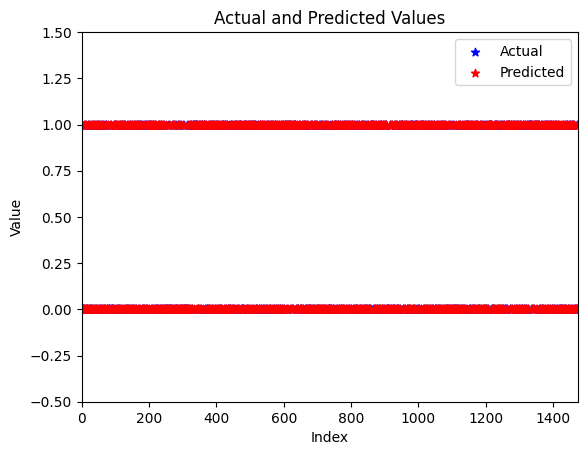

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('/content/movie_review.csv')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['review_text'], data['sentiment'], test_size=0.2, random_state=42)

# Create a CountVectorizer to convert text into numerical features
vectorizer = CountVectorizer()

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Create the Multinomial Naive Bayes classifier
classifier = MultinomialNB()

# Train the classifier
classifier.fit(X_train_vectorized, y_train)

# Transform the testing data
X_test_vectorized = vectorizer.transform(X_test)

# Predict the sentiment of the testing data
predictions = classifier.predict(X_test_vectorized)

# Convert predictions and actual values to data frames
df = pd.DataFrame({'Predicted': predictions, 'Actual': y_test})

# Plot the actual values
plt.scatter(range(len(df)), df['Actual'], marker='*', color='blue', label='Actual')

# Plot the predicted values
plt.scatter(range(len(df)), df['Predicted'], marker='*', color='red', label='Predicted')

# Set x-axis limits and labels
plt.xlim(0, len(df))
plt.xlabel('Index')

# Set y-axis limits and labels
plt.ylim(-0.5, 1.5)
plt.ylabel('Value')

# Set the title and legend
plt.title('Actual and Predicted Values')
plt.legend()

# Display the graph
plt.show()
